In [107]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans,  AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
warnings.filterwarnings('ignore')

In [3]:
perf = pd.read_csv('academic_performance_data.csv')

In [4]:
perf.head()

,Student_ID,Age,GPA,Study_Hours_per_Week,Absences,Participation_Score,Extracurricular,Exam_Score
0,1,24,3.74,15,2,92,1,83.65
1,2,21,2.17,26,8,23,0,91.22
2,3,30,3.19,12,19,23,0,69.85
3,4,28,3.97,11,5,3,1,57.82
4,5,25,3.07,32,17,66,0,86.90


In [7]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(perf)

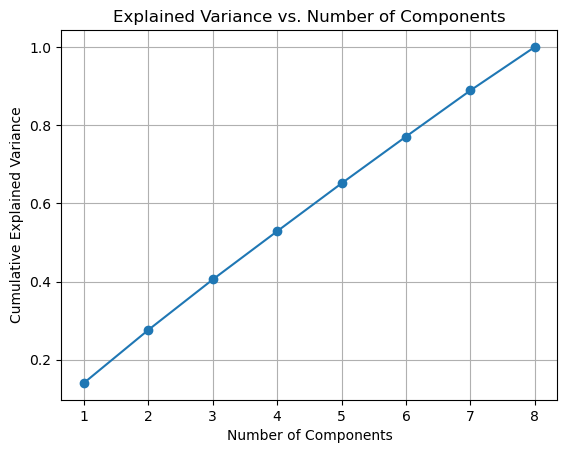

In [13]:
pca = PCA().fit(scaled_data)

# Cumulative explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Plot the cumulative explained variance
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [86]:
pca = PCA(n_components = 2)
pca_data = pca.fit_transform(scaled_data)

In [87]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)

In [108]:
data = pca_data

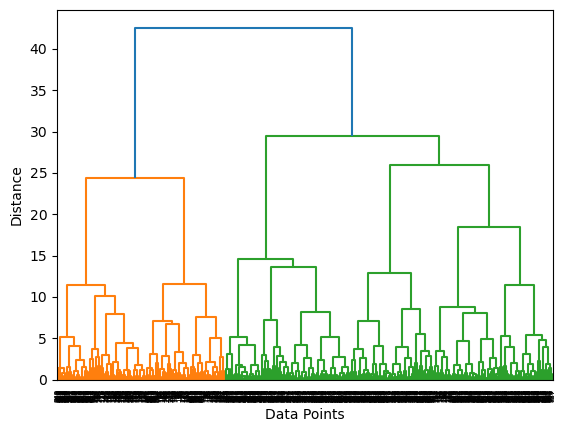

In [109]:
z = linkage(data, method = 'ward')
dendrogram(z)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

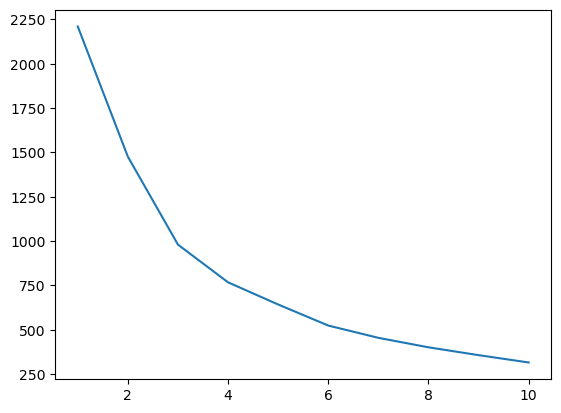

In [88]:
plt.plot(range(1,11), wcss)

In [96]:
kmeans = KMeans(n_clusters = 4, random_state = 42)
cluster = kmeans.fit_predict(perf)

In [118]:
agg_cluster = AgglomerativeClustering(n_clusters = 4)
cluster2 = agg_cluster.fit_predict(pca_data)

In [119]:
pca_data['Cluster2'] = cluster2

In [97]:
perf['Cluster'] = cluster

In [120]:
score = silhouette_score(pca_data, pca_data['Cluster2'])
score

0.40187120256324693

In [126]:
pca_data

,PCA1,PCA2,Clusters
0,-0.592865,-1.867036,3
1,0.460289,1.264897,1
2,0.625613,-1.896465,3
3,1.412539,-2.752613,3
4,-0.813944,-0.394522,3
...,...,...,...
995,0.504037,1.490631,1
996,-0.278676,1.307824,1
997,-0.994407,1.575390,1
998,0.982260,3.976357,1


In [122]:
pca_data = pd.DataFrame(pca_data, columns = ['PCA1', 'PCA2',])
pca_data['Clusters'] = cluster2

<Axes: xlabel='PCA1', ylabel='PCA2'>

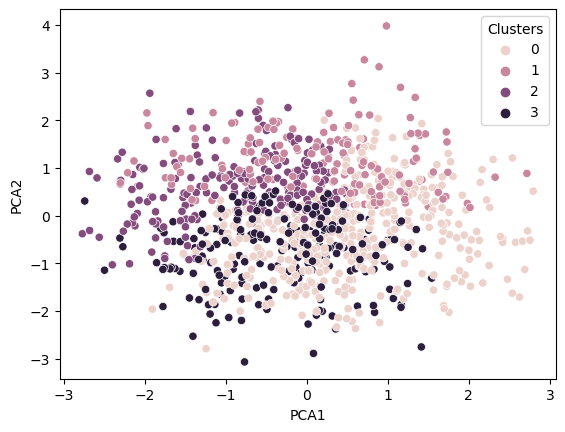

In [125]:
sns.scatterplot(pca_data, x ='PCA1', y = 'PCA2', hue = pca_data['Clusters'])